In [1]:
import sympy as sp

In [2]:
sp.var('x E')
sp.var('y', cls=sp.Function);

In [3]:
d = sp.Piecewise(
  (0.035, x < 0.04),
  (0.04, x < 0.1),
  (0.045, x < 0.21),
  (0.04, x < 0.275),
  (0.035, True),
)
d

Piecewise((0.035, x < 0.04), (0.04, x < 0.1), (0.045, x < 0.21), (0.04, x < 0.275), (0.035, True))

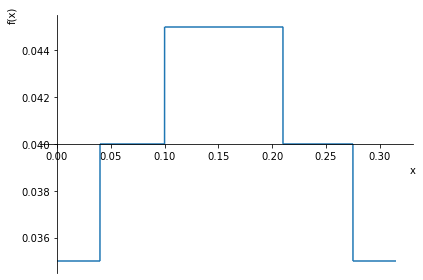

In [4]:
sp.plot(d, (x, 0, 0.315));

In [5]:
I = sp.pi * d**4 / 64
I

pi*Piecewise((1.500625e-6, x < 0.04), (2.56e-6, x < 0.1), (4.100625e-6, x < 0.21), (2.56e-6, x < 0.275), (1.500625e-6, True))/64

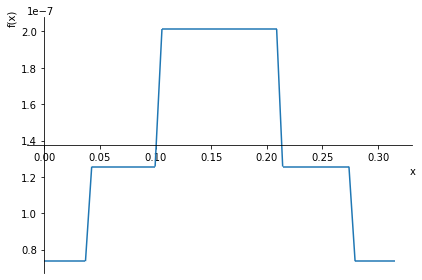

In [6]:
sp.plot(I, (x, 0, 0.315));

In [7]:
M = sp.Piecewise(
  (3889 * x, x < 0.14),
  (980 - 3111 * x, True),
)
M

Piecewise((3889*x, x < 0.14), (980 - 3111*x, True))

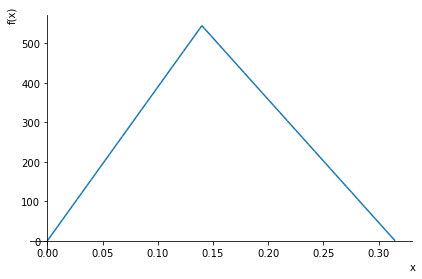

In [8]:
sp.plot(M, (x, 0, 0.315));

In [9]:
eqs = [sp.Eq(sp.diff(y(x), x, x), sp.simplify(M / (E * I)))]
sols = sp.dsolve(eqs, func=[y(x)], ics={y(0.0): 0, y(0.315): 0})
eqs[0]

Eq(Derivative(y(x), (x, 2)), Piecewise((165861557684.298*x/(pi*E), x < 0.04), (97225000000.0*x/(pi*E), x < 0.1), (60697088858.4057*x/(pi*E), x < 0.14), ((15295229385.7644 - 48554549611.3397*x)/(pi*E), x < 0.21), ((24500000000.0 - 77775000000.0*x)/(pi*E), x < 0.275), ((41795918367.3469 - 132680716368.18*x)/(pi*E), True)))

In [10]:
len(sols)

1

In [11]:
sol = sols[0].simplify()
sol

Eq(y(x), Piecewise((x*(8799228924.79252*x**2 - 1396950617.03929)/E, x < 0.04), (1.0*(5157946447.36984*x**3 - 1379472461.14766*x - 466084.157110103)/E, x < 0.1), (1.0*(3220080574.36776*x**3 - 1321336484.9576*x - 4341815.90311427)/E, x < 0.14), (1.0*(-2575898860.08179*x**3 + 2434311362.46882*x**2 - 1662140075.70323*x + 11562351.6650154)/E, x < 0.21), (1.0*(-4126091899.65739*x**3 + 3899296105.75144*x**2 - 2072343128.74608*x + 47455503.3647597)/E, x < 0.275), (1.0*(-7038930620.98986*x**3 + 6652027009.2286*x**2 - 2925494840.75622*x + 134474892.374797)/E, True)))

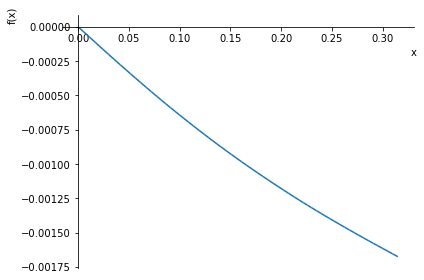

In [12]:
sp.plot(sol.rhs.subs(E, 207e9), (x, 0, 0.315));

In [13]:
yp = sp.diff(sol.rhs, x)
yp

Piecewise((17598457849.585*x**2/E + (8799228924.79252*x**2 - 1396950617.03929)/E, x < 0.04), (1.0*(15473839342.1095*x**2 - 1379472461.14766)/E, x < 0.1), (1.0*(9660241723.10327*x**2 - 1321336484.9576)/E, x < 0.14), (1.0*(-7727696580.24538*x**2 + 4868622724.93764*x - 1662140075.70323)/E, x < 0.21), (1.0*(-12378275698.9722*x**2 + 7798592211.50287*x - 2072343128.74608)/E, x < 0.275), (1.0*(-21116791862.9696*x**2 + 13304054018.4572*x - 2925494840.75622)/E, True))

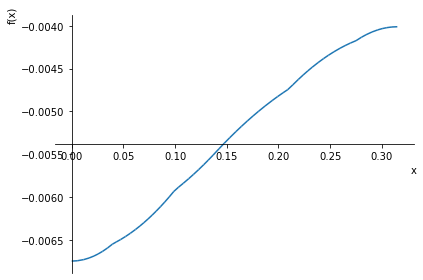

In [14]:
sp.plot(yp.subs(E, 207e9), (x, 0, 0.315));

In [15]:
yp.subs(x, 0)

-1396950617.03929/E

In [16]:
yp.subs(x, 0.14)

-1131995747.18477/E

In [17]:
yp.subs(x, 0.315)

-830031497.545357/E